# 階層分群法 觀察 : 使用 2D 樣板資料集

# [教學目標]
- 將階層式聚類套用在 2D 樣板資料上, 來觀察幾種不同參數的結果有何不同 
- 因為非監督模型的效果, 較難以簡單的範例看出來  
  所以後續非監督偶數日提供的範例與作業, 主要目的在於觀察非監督模型的效果,  
  同學只要能感受到模型效果即可, 不用執著於搞懂程式的每一個部分

# [範例重點]
- 以幾種 2D 樣板資料, 觀察階層式聚類在 "linkage參數" 有所不同時, 分群的效果如何變化 (In[3], Out[3])

In [1]:
# 載入套件
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

In [2]:
# 設定 2D 樣板資料
n_samples = 1500
random_state = 100

# 生成 同心圓 資料點
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)

# 生成 斜向三群 資料點 (使用轉換矩陣)
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# 生成 稀疏三群 資料點
varied = datasets.make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state)

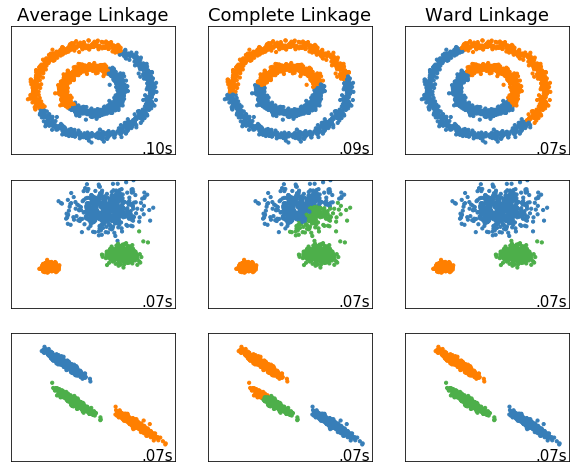

In [3]:
# 設定群集與繪圖參數
plt.figure(figsize=(10, 8))
plot_num = 1
default_base = {'n_neighbors': 10, 'n_clusters': 3}
datasets = [(noisy_circles, {'n_clusters': 2}), (varied, {'n_neighbors': 2}), (aniso, {'n_neighbors': 2})]

# 執行各種樣板資料的繪圖迴圈
for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # 複製參數與標準化
    params = default_base.copy()
    params.update(algo_params)    
    X, y = dataset
    X = StandardScaler().fit_transform(X)

    # 設定三種不同參數的 Hierarchical clustering
    ward = cluster.AgglomerativeClustering(n_clusters=params['n_clusters'], linkage="ward")
    complete = cluster.AgglomerativeClustering(n_clusters=params['n_clusters'], linkage="complete")
    average = cluster.AgglomerativeClustering(n_clusters=params['n_clusters'], linkage="average")
    clustering_algorithms = (
        ('Average Linkage', average),
        ('Complete Linkage', complete),
        ('Ward Linkage', ward))

    # 繪製三種圖形
    for name, algorithm in clustering_algorithms:
        # t0 / t1 : 紀錄時間差
        t0 = time.time()
        algorithm.fit(X)
        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'), transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1
plt.show()

# 觀察結果
* 同心圓 : 三者效果中 Complete 的效果似乎是最差
* 三群 : Average 與 Ward 效果都還不錯
* 斜三群 : 三者效果也是以 Complete 較差
* 同學可以試著替換不同的 random_state 觀察, 會有不同的結果